<div class="alert alert-block alert-warning">
1. Com o espaço de estados das cidades da Romênia, escolha duas cidades para buscar uma rota usando a implementação de busca em largura que foi vista nos vídeos. Mostre o passo a passo da busca. 
</div>

In [1]:
def acao(destino, custo):
    return {"destino": destino, "custo": custo}

estados_romenia = [
    {"estado": "Arad", "acoes": [acao("Zerind", 75), acao("Sibiu", 140), acao("Timisoara", 118)]},
    {"estado": "Zerind", "acoes": [acao("Arad", 75), acao("Oradea", 71)]},
    {"estado": "Timisoara", "acoes": [acao("Arad", 118), acao("Lugoj", 111)]},
    {"estado": "Sibiu","acoes": [acao("Arad", 140), acao("Oradea", 151), acao("Fagaras", 99), acao("Rimnicu Vilcea", 80)]},
    {"estado": "Oradea", "acoes": [acao("Zerind", 71), acao("Sibiu", 151)]},
    {"estado": "Lugoj", "acoes": [acao("Timisoara", 111), acao("Mehadia", 70)]},
    {"estado": "Mehadia", "acoes": [acao("Lugoj", 70), acao("Drobeta", 75)]},
    {"estado": "Drobeta", "acoes": [acao("Mehadia", 75), acao("Craiova", 120)]},
    {"estado": "Craiova", "acoes": [acao("Drobeta", 120), acao("Rimnicu Vilcea", 146), acao("Pitesti", 138)]},
    {"estado": "Rimnicu Vilcea", "acoes": [acao("Sibiu", 80), acao("Craiova", 146), acao("Pitesti", 97)]},
    {"estado": "Fagaras", "acoes": [acao("Sibiu", 99), acao("Bucharest", 211)]},
    {"estado": "Pitesti", "acoes": [acao("Rimnicu Vilcea", 97), acao("Craiova", 138), acao("Bucharest", 101)]},
    {"estado": "Giurgiu", "acoes": [acao("Bucharest", 90)]},
    {"estado": "Bucharest", "acoes": [acao("Fagaras", 211), acao("Pitesti", 101), acao("Giurgiu", 90), acao("Urziceni", 85)]},
    {"estado": "Urziceni", "acoes": [acao("Bucharest", 85), acao("Vaslui", 142), acao("Hirsova", 98)]},
    {"estado": "Hirsova", "acoes": [acao("Urziceni", 98), acao("Eforie", 86)]},
    {"estado": "Eforie", "acoes": [acao("Hirsova", 86)]},
    {"estado": "Vaslui", "acoes": [acao("Urziceni", 142), acao("Iasi", 92)]},
    {"estado": "Iasi", "acoes": [acao("Vaslui", 92), acao("Neamt", 87)]},
    {"estado": "Neamt", "acoes": [acao("Iasi", 87)]}
]

class No:
    def __init__(self, estado, custo, pai, acao):
        self.estado = estado
        self.custo = custo
        self.pai = pai
        self.acao = acao

    def __str__(self):
        return f'({self.estado}, {self.custo})'

    def __repr__(self):
        return self.__str__()

    def filhos(self, problema):
        espaco_acoes = next(e for e in problema.espaco_estados if e['estado'] == self.estado)

        resultado = []
        for acao in espaco_acoes['acoes']:
            filho = No(acao['destino'], self.custo + acao['custo'],
                       self, acao['destino'])
            resultado.append(filho)

        return resultado

    def constroi_solucao(self):
        no_atual = self
        solucao = [no_atual]
        while no_atual.pai != None:
            no_atual = no_atual.pai
            solucao.insert(0, no_atual)

        return solucao

class Problema:
    def __init__(self, espaco_estados, inicial, objetivo):
        self.espaco_estados = espaco_estados
        self.inicial = inicial
        self.objetivo = objetivo


BUSCA_INICIANDO = 0
BUSCA_FALHOU = 1
BUSCA_SUCESSO = 2
BUSCA_EM_CURSO = 3

class BuscaLargura:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
            self.passo_busca()

        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca teve sucesso")
            print(f"Solucao: {self.solucao}")

        return

    def passo_busca(self):
        if (self.situacao == BUSCA_FALHOU):
            print("Busca falhou")
            return

        if (self.situacao == BUSCA_SUCESSO):
            print("Busca chegou ao objetivo com sucesso")
            return

        try:
            no = self.fronteira.pop(0)
        except IndexError:
            self.situacao = BUSCA_FALHOU
            return

        # faz teste do objetivo
        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return

        # obtem os filhos do no
        for filho in no.filhos(self.problema):
            if not (filho in self.fronteira) and not (filho.estado in self.visitados):
                self.fronteira.append(filho)
                self.visitados.append(filho.estado)
        return
    
    

def passo_a_passo(busca):
    print("")
    print("----------------------------------------------------------------")
    print(f"Fronteira: {busca.fronteira}")
    print(f"Visitados: {busca.visitados}")
    busca.passo_busca()
    print(f"Próximo nó a ser visitado: {busca.fronteira[0]}")
    print("----------------------------------------------------------------")
    print("")
    
#no_arad = No('Arad', 0, None, None)
#problema_romenia = Problema(cidades_romenia, no_arad, lambda no: no.estado == 'Bucharest')

Tendo em mente que os nós do grafo estão distribuídos das seguintes maneiras:

<center><img src="https://i.imgur.com/kC7DAJD.png" alt="Grafo romenia" width="500" height="600"></center> 
 
 Vamos aplicar o método de busca em largura para gerar um percurso de ***Craiova*** até ***Arad***
 
 É esperado que o algoritmo siga uma ordem tal qual a ordem descrita na imagem abaixo:
 <center><img src="https://i.imgur.com/46J6eUX.png" alt="Grafo romenia" width="500" height="600"></center>
 
 
Onde ele começa pela cidade de **Craiova**, e então vai explorando primeiramente os nós que estão diretamente conectados à Craiova, os nós que estão a **um nível** de distância de Craiova(Rimnicu Vilcea, Pitesti e Drobeta), para então visitarem os nós que estão a uma distância de **dois níveis** (Sibiu, Bucharest e Mehadia) e assim em diante até que seja encontrado o destino final, **Arad**
 

In [2]:
problema_craiova_arad = Problema(estados_romenia, No('Craiova', 0, None, None), lambda no: no.estado == 'Arad')
busca_largura_craiova_arad = BuscaLargura(problema_craiova_arad)
while busca_largura_craiova_arad.situacao != BUSCA_SUCESSO:
    passo_a_passo(busca_largura_craiova_arad)


----------------------------------------------------------------
Fronteira: [(Craiova, 0)]
Visitados: ['Craiova']
Próximo nó a ser visitado: (Drobeta, 120)
----------------------------------------------------------------


----------------------------------------------------------------
Fronteira: [(Drobeta, 120), (Rimnicu Vilcea, 146), (Pitesti, 138)]
Visitados: ['Craiova', 'Drobeta', 'Rimnicu Vilcea', 'Pitesti']
Próximo nó a ser visitado: (Rimnicu Vilcea, 146)
----------------------------------------------------------------


----------------------------------------------------------------
Fronteira: [(Rimnicu Vilcea, 146), (Pitesti, 138), (Mehadia, 195)]
Visitados: ['Craiova', 'Drobeta', 'Rimnicu Vilcea', 'Pitesti', 'Mehadia']
Próximo nó a ser visitado: (Pitesti, 138)
----------------------------------------------------------------


----------------------------------------------------------------
Fronteira: [(Pitesti, 138), (Mehadia, 195), (Sibiu, 226)]
Visitados: ['Craiova', 'Dro

<div class="alert alert-block alert-info">
Podemos ver que, o que foi esperado de fato aconteceu, a rota traçada pelo algoritmo foi:

<code style="background:black;color:white">Craiova -> Drobeta -> Rimnicu Vilcea -> Pitesti ->
Mehadia -> Sibiu -> Bucharest -> Lugoj -> Arad</code>
</div>

<div class="alert alert-block alert-warning">
    2. Usando a implementação de busca em largura que foi vista no vídeo como base, crie uma
    implementação similar para a busca em profundidade. O vídeo sobre busca em
    profundidade explica qual alteração deve ser feita. Se o grupo preferir usar outra
    linguagem, pode portar o código que foi desenvolvido nas aulas para outra linguagem, e
    implementar a busca em profundidade. A implementação deve seguir o modelo da busca
    em largura e ter uma função que permita executar apenas um passo da busca de cada vez.
</div>

<div class="alert alert-block alert-info">
A diferença entre a busca em largura e a busca em profundidade é a estrutura de dado utilizada para gerenciar os nós que serão visitados, na <b>busca em largura (BFS)</b> utiliza-se uma <b>fila</b>, e o método que rege a fila é o <b>First In, First Out (FIFO)</b>, isso implica em dizer que os nós que serão descobertos por último serão explorados por último, por isso a busca em largura se dá em níveis de distância do nó de partida. Enquanto isso na <b>busca em profundidade (DFS)</b>, a estrutura de dado utilizada para gerenciar os nós é a <b>pilha</b>, e a fila segue o método <b>First In, Last Out (FILO)</b>, onde os nós que são descobertos no começo perdem preferência para os nós que são recém-descobertos, e então o algoritmo tende a seguir uma linha e ir explorando os nós que estão mais distantes ao nó inicial.
<br>
<br>


Utilizando o <b>DFS</b> para resolver o mesmo problema da questão anterior de encontrar um caminho saindo de <b>Craiova até Arad</b> um resultado possível seria tal qual está descrito na imagem abaixo:
    
<center><img src='https://i.imgur.com/MFXFiVT.png' width=500, height=600></center>
    

Podemos notar que o algoritmo de DFS explora em níveis bastante distantes do nó de partida
</div>


In [3]:
#Utilizando-se do código do professor para indicar a única mudança necessária
#para transformar um algoritmo de busca em largura para um de busca em profundidade
class BuscaProfundidade:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
            self.passo_busca()

        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca teve sucesso")
            print(f"Solucao: {self.solucao}")

        return

    def passo_busca(self):
        if (self.situacao == BUSCA_FALHOU):
            print("Busca falhou")
            return

        if (self.situacao == BUSCA_SUCESSO):
            print("Busca chegou ao objetivo com sucesso")
            return

        try:
            #Unica alteração necessária para mudar o algoritmo de busca em largura para profundidade
            #Código original: no = self.fronteira.pop(0)
            no = self.fronteira.pop()
        except IndexError:
            self.situacao = BUSCA_FALHOU
            return

        # faz teste do objetivo
        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return

        # obtem os filhos do no
        for filho in no.filhos(self.problema):
            if not (filho in self.fronteira) and not (filho.estado in self.visitados):
                self.fronteira.append(filho)
                self.visitados.append(filho.estado)
        return

In [4]:
#Funções auxiliares para os algoritmos de busca
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import sys

def ilustrar_percurso(percurso):
    for i in range(len(percurso)-1):
        print(percurso[i], end=" -> ")
    print(percurso[-1])

def get_estado(estado):
    for e in estados_romenia:
        if e["estado"] == estado:
            return e
    return None

def get_all_acoes(estado):
    return get_estado(estado)['acoes']

def get_custo(estado, destino):
    for acao in get_all_acoes(estado):
        if acao["destino"] == destino:
            return acao["custo"]
    return False

def get_custo_total(percurso):
    custo_total = 0
    for i in range(len(percurso)-1):
        custo_total += get_custo(percurso[i], percurso[i+1])
    return custo_total

def get_all_destinos(estado):
    destinos = []
    for acao in get_all_acoes(estado):
        destinos.append(acao["destino"])
    return destinos

def get_viable_path_from_algo(algoritmo):
    '''
    Retorna um caminho viável a partir do resultado de um algoritmo de busca
    '''
    viable_path = []
    starting_point = algoritmo[0]
    ending_point = algoritmo[-1]
    viable_path.append(starting_point)
    ultimo_ponto_de_viabilidade = ending_point
    for i in range(1, len(algoritmo)-1):
        all_destinos = get_all_destinos(ultimo_ponto_de_viabilidade).copy()
        random.shuffle(all_destinos)
        if algoritmo[-1-i] in all_destinos:
            ultimo_ponto_de_viabilidade = algoritmo[-1-i]
            viable_path.insert(1, ultimo_ponto_de_viabilidade)
    viable_path.append(ending_point)
    return viable_path


def brute_force_lowest_cost(starting_point, max_iter=1000):
    '''
    Função que realiza uma busca em força bruta para encontrar o menor custo de um caminho entre dois pontos.
    '''
    def dfs_completo(start):
        pilha = [start]
        algoritmo = []
        while pilha:
            estado_atual = pilha.pop()
            algoritmo.append(estado_atual)
            all_acoes = get_all_acoes(estado_atual).copy()
            random.shuffle(all_acoes)
            for acao in all_acoes:
                if acao["destino"] not in algoritmo and acao["destino"] not in pilha:
                    pilha.append(acao["destino"])
        return algoritmo

    highest_cost = 0
    lowest_cost = 100000
    lowest_cost_path = []
    highest_cost_path = []
    for i in range(max_iter):
        algo = dfs_completo(starting_point)
        custo_total = get_custo_total(algo)
        if custo_total < lowest_cost:
            lowest_cost = custo_total
            lowest_cost_path = algo
        if custo_total > highest_cost:
            highest_cost = custo_total
            highest_cost_path = algo
    return {'lowest_cost': lowest_cost, 'lowest_cost_path': lowest_cost_path, 'highest_cost': highest_cost, 'highest_cost_path': highest_cost_path}

def highlight_path(algoritmo, cost, viable_path):
    '''
    Função que desenha o grafo com os estados da Bulgária, o caminho percorrido pelo algoritmo até o ponto final, e um possível caminho viável.
    O custo se dá pelo somatório do custo de deslocamento para cada par de estados do possível caminho viável.
    '''
    G = nx.Graph()
    for estado in estados_romenia:
        for acao in estado["acoes"]:
            G.add_edge(estado["estado"], acao["destino"], weight=acao["custo"])
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, font_color='black', font_weight='bold', node_size=300, node_color='skyblue', font_size=8,
    width=1, edge_color='black', alpha=1, arrows=True, arrowstyle='<->',  arrowsize=10,
    connectionstyle='arc3, rad=0.15', style='dashed', edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1,
    linewidths=1, label='Romenia', font_family='sans-serif')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, font_color="red", font_weight="bold", label_pos=0.5, rotate=False)
    #increase the size of the graph
    fig = plt.gcf()
    fig.set_size_inches(5, 5)
    fig.set_dpi(150)

    plt.text(-0.00, 0.99, f"Vermelho: Estados visitados pelo algoritmo\nVerde: Rota viável", fontsize=5, bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)

    for estado in algoritmo:
        nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='red', node_size=300, alpha=1)
        #Put numbers on top of the nodes according to the order they were visited
        plt.text(pos[estado][0]*1, pos[estado][1]-0.1, str(algoritmo.index(estado)), fontsize=5, fontweight='bold', color='white', horizontalalignment='center', verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=2, foreground='red'), pe.Normal()])
    #Draw a square on the corner of the graph to show the cost
    for estado in viable_path:
        nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='green', node_size=300, alpha=1)
        plt.text(pos[estado][0]*1, pos[estado][1]+0.1, str(viable_path.index(estado)), fontsize=5, fontweight='bold', color='black', horizontalalignment='center', verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=2, foreground='green')],
        )

    plt.title(f"Custo total da rota viável: {cost}", fontsize=5, fontweight='bold', color='black', loc='left', horizontalalignment='left', verticalalignment='center')
    

def illustrate_stack(stack):
    for idx, estado in enumerate(reversed(stack)):
        print(" ╭――――――――――――――――――╮")
        print(f" │ {estado.center(15)}  │", end="")
        if idx == 0:
            print(" <--- Próximo destino")
        else:
            print("")
        print(" ╰――――――――――――――――――╯")
        if idx == len(stack) - 1:
            print("└─────────┬───────────┘")
            print("        Pilha")
    print("")

    
def illustrate_queue(queue):
    queue_reverse = queue[::-1].copy()
    for i in range(len(queue)):
        print(" ╭――――――――――――――――――╮")
        print(f" │ {queue_reverse[i].center(15)}  │", end="")
        if i == len(queue) - 1:
            print(" <--- Próximo destino")
        else:
            print("")
        print(" ╰――――――――――――――――――╯")
        if i == len(queue) - 1:
            print("└─────────┬───────────┘")
            print("        Fila")
    print("")

def clear_output(wait=False): #Por alguma razão o Jupyter não estava conseguind oacessar essa função padrão do Python.
    """Clear the output of the current cell receiving output.

    Parameters
    ----------
    wait : bool [default: false]
        Wait to clear the output until new output is available to replace it."""
    from IPython.core.interactiveshell import InteractiveShell
    if InteractiveShell.initialized():
        InteractiveShell.instance().display_pub.clear_output(wait)
    else:
        print('\033[2K\r', end='')
        sys.stdout.flush()
        print('\033[2K\r', end='')
        sys.stderr.flush()

In [5]:
#Alternativa de implementação para DFS:
import random, time
random.seed(0)

def dfs(start, goal, illustrate=False, optimize=True):
    if start == goal:
        return [start]
    pilha = [start]
    algoritmo = []
    while pilha:
        estado_atual = pilha.pop()
        algoritmo.append(estado_atual)
        all_acoes = get_all_acoes(estado_atual).copy()
        random.shuffle(all_acoes) #Para permitir que o algoritmo escolha caminhos diferentes toda vez que for chamado
        if optimize:
            if goal in get_all_destinos(estado_atual):
                algoritmo.append(goal)
                pilha.append(goal)
                if illustrate:
                    print(f"Estado atual: {estado_atual}")
                    illustrate_stack(pilha)
                    print("\n")
                return algoritmo
            for acao in all_acoes:
                #Evita que entrem na fila
                if acao["destino"] not in algoritmo and acao["destino"] not in pilha:
                    pilha.append(acao["destino"])
        else:
            if estado_atual == goal:
                return algoritmo
            for acao in all_acoes:
                if acao["destino"] not in algoritmo:
                    pilha.append(acao["destino"])
        if illustrate:
            print(f"Estado atual: {estado_atual}")
            illustrate_stack(pilha)
            time.sleep(2)
            print("\n")
    return False

<div class="alert alert-block alert-info">
<b>Usando então o algoritmo de DFS desenvolvido acima</b>, aplicado para o mesmo problema de encontrar um caminho de <b>Craiova até Arad</b> obtemos o seguinte resultado:

<code style="background:black;color:white">Craiova -> Rimnicu Vilcea -> Sibiu -> Arad</code>
</div>

In [6]:
dfs_craiova_arad = dfs("Craiova","Arad")

In [7]:
dfs_craiova_arad_viable_path = get_viable_path_from_algo(dfs_craiova_arad)

In [8]:
ilustrar_percurso(dfs_craiova_arad_viable_path)

Craiova -> Rimnicu Vilcea -> Sibiu -> Arad


In [9]:
dfs_craiova_arad_cost = get_custo_total(dfs_craiova_arad_viable_path)

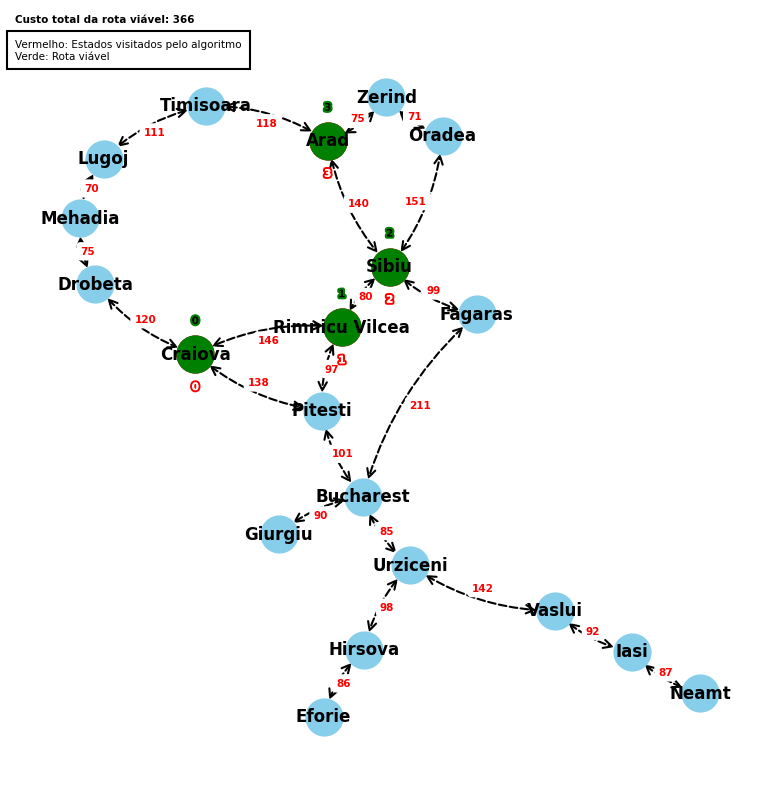

In [10]:
highlight_path(dfs_craiova_arad, dfs_craiova_arad_cost, dfs_craiova_arad_viable_path)

<div class="alert alert-block alert-info">
<b>Utilizando o código do professor</b>, encontramos uma rota similar de <b>Craiova até Arad</b>:

<code style="background:black;color:white">Craiova -> Pitesti -> Bucharest -> Fagaras -> Sibiu -> Arad</code>
</div>

In [11]:
problema_craiova_arad = Problema(estados_romenia, No('Craiova', 0, None, None), lambda no: no.estado == 'Arad')
busca_profundidade_craiova_arad = BuscaProfundidade(problema_craiova_arad)
busca_profundidade_craiova_arad.executar()

Busca teve sucesso
Solucao: [(Craiova, 0), (Pitesti, 138), (Bucharest, 239), (Fagaras, 450), (Sibiu, 549), (Arad, 689)]


<div class="alert alert-block alert-warning">
    3. Usando a implementação de busca em profundidade desenvolvida para a questão anterior,
    resolva o problema de busca de rotas na Romênia (de Arad a Bucareste), usando os dados
    do livro e que estão disponíveis no código-fonte. Mostre o passo a passo da solução
    através da busca em profundidade e como a sequência de nós explorados difere da busca
    em largura.
</div>

<div class="alert alert-block alert-info">
O código abaixo irá ilustrar o processo de decisão do algoritmo passo a passo a cada nó novo descoberto
<br>
<br>
O seguinte caminho será ilustrado: 
<code style="background:black;color:white">Arad -> Sibiu -> Oradea -> Fagaras -> Bucharest</code>
</div>

In [12]:
ilustrar_percurso(dfs_arad_bucharest)

NameError: name 'dfs_arad_bucharest' is not defined

In [ ]:
dfs_arad_bucharest = dfs("Arad", "Bucharest", illustrate=True)

<div class="alert alert-block alert-info">
O trajeto <code style="background:black;color:white">Arad -> Sibiu -> Oradea -> Fagaras -> Bucharest</code> descoberto pelo algoritmo de DFS <b>não configura um caminho válido</b> pois não é possível ir diretamente de <b>Oradea</b> para <b>Fagaras</b>, há a necessidade de se chamar a função <code>get_viable_path_from_algo</code> para que seja possível extrair um caminho <b>válido</b> dessa lista de nós.
<br>
<br>
O caminho válido que a função <code>get_viable_path_from_algo</code> deve retornar será: <code style="background:black;color:white">Arad -> Sibiu -> Fagaras -> Bucharest</code>

</div>


In [ ]:
dfs_arad_bucharest_viable_path = get_viable_path_from_algo(dfs_arad_bucharest)

In [ ]:
ilustrar_percurso(dfs_arad_bucharest_viable_path)

<div class="alert alert-block alert-info">
    Analisando o mesmo problema utilizando o algoritmo <b>BFS</b> podemos ilustrar claramente as diferenças entre os percusos dos dois algoritmos
</div>


In [ ]:
def bfs(start, goal, illustrate=False, optimize=True):
    if start == goal:
        return [start]
    fila = [start]
    algoritmo = []
    while fila:
        estado_atual = fila.pop(0)
        algoritmo.append(estado_atual)
        all_acoes = get_all_acoes(estado_atual).copy()
        random.shuffle(all_acoes) #Para permitir que o algoritmo escolha caminhos diferentes toda vez que for chamado
        if optimize:
            if goal in get_all_destinos(estado_atual):
                algoritmo.append(goal)
                fila.insert(0, goal)
                if illustrate:
                    print(f"Estado atual: {estado_atual}")
                    illustrate_queue(fila)
                    print("\n")
                return algoritmo
            for acao in all_acoes:
                #Evita que entrem na fila
                if acao["destino"] not in algoritmo and acao["destino"] not in fila:
                    fila.append(acao["destino"])
        else:
            if estado_atual == goal:
                return algoritmo
            for acao in all_acoes:
                if acao["destino"] not in algoritmo:
                    fila.append(acao["destino"])
        if illustrate:
            print(f"Estado atual: {estado_atual}")
            illustrate_queue(fila)
            #time.sleep(2)
            print("\n")
    return False

In [ ]:
random.seed(0)
bfs_arad_bucharest = bfs("Arad","Bucharest", illustrate=True, optimize=True)

In [ ]:
ilustrar_percurso(bfs_arad_bucharest)

<div class="alert alert-block alert-info">
Seguindo o mesmo processo feito anteriormente, podemos extrair um caminho viável do percurso <code style="background:black;color:white">Arad -> Zerind -> Timisoara -> Sibiu -> Oradea -> Lugoj -> Fagaras -> Bucharest</code>
    <br>
    <br>
    Tal percurso seria nesse caso: <code style="background:black;color:white">Arad -> Sibiu -> Fagaras -> Bucharest</code>
</div>

In [ ]:
bfs_arad_bucharest_viable_path = get_viable_path_from_algo(bfs_arad_bucharest)
ilustrar_percurso(bfs_arad_bucharest_viable_path)

<div class="alert alert-block alert-info">
    Com os dois algoritmos rodados para o mesmo trajeto podemos então ilustrar por meio da biblioteca NetworkX os algoritmos e os trajetos viáveis encontrados dentro deles, através da função <code>highlight_path</code>
</div>

In [ ]:
#Gráfico para o algoritmo DFS
highlight_path(dfs_arad_bucharest, get_custo_total(dfs_arad_bucharest_viable_path), dfs_arad_bucharest_viable_path)

In [ ]:
#Gráfico para o algoritmo BFS
highlight_path(bfs_arad_bucharest, get_custo_total(bfs_arad_bucharest_viable_path), bfs_arad_bucharest_viable_path)

<div class="alert alert-block alert-info">
    Ainda mais, por meio de <b>força bruta</b>, podemos analisar se encontramos algum outro caminho mais eficiente, ou seja, com um <b>menor custo</b>, do que o caminho encontrado previamente.
</div>

In [ ]:
def brute_force_lowest_cost(starting_point, ending_point, search_algo='dfs', max_iter=300):
    '''
    Função que realiza uma busca em força bruta para encontrar o menor custo de um caminho entre dois pontos.
    '''
    highest_cost = 0
    lowest_cost = 100000
    lowest_cost_path = []
    highest_cost_path = []
    for i in range(max_iter):
        if search_algo == 'dfs':
            algo = dfs(starting_point, ending_point)
        elif search_algo == 'bfs':
            algo = bfs(starting_point, ending_point)
        viable_path = get_viable_path_from_algo(algo)
        custo_total = get_custo_total(viable_path)
        if custo_total < lowest_cost:
            lowest_cost = custo_total
            lowest_cost_path = viable_path
        if custo_total > highest_cost:
            highest_cost = custo_total
            highest_cost_path = viable_path
    return {'lowest_cost': lowest_cost, 'lowest_cost_path': lowest_cost_path, 'highest_cost': highest_cost, 'highest_cost_path': highest_cost_path}

dfs_arad_bucharest_brute_force = brute_force_lowest_cost("Arad", "Bucharest", search_algo='dfs', max_iter=1000)
bfs_arad_bucharest_brute_force = brute_force_lowest_cost("Arad", "Bucharest", search_algo='bfs', max_iter=1000)

In [ ]:
bfs_arad_eforie_brute_force = brute_force_lowest_cost("Arad", "Eforie", search_algo='bfs', max_iter=1000)

In [ ]:
dfs_arad_bucharest_brute_force

In [ ]:
bfs_arad_bucharest_brute_force

<div class="alert alert-block alert-info">
    Podemos ver então que para o algoritmo de <b>DFS</b> o caminho de menor custo é de <b>418</b>, enquanto do de maior custo, tem um custo aproximadamente duas vezes maior: <b>838</b>
    <br>
    <br>
    Já para o algoritmo de <b>BFS</b>, sempre é gerado o mesmo percurso para o trajeto <b>Arad -> Bucharest</b>, com valor de <b>450</b>.
        <br>
    <br>
    Abaixo podemos <b>visualizar as diferenças entre os três trajetos encontrados</b> (O trajeto de maior e menor com algoritmo DFS, e o trajeto com o algoritmo BFS)
</div>

In [ ]:
dfs_menor_custo = dfs_arad_bucharest_brute_force
highlight_path(dfs_arad_bucharest_brute_force['lowest_cost_path'], dfs_arad_bucharest_brute_force['lowest_cost'] ,dfs_arad_bucharest_brute_force['lowest_cost_path'])

In [ ]:
highlight_path(dfs_arad_bucharest_brute_force['highest_cost_path'], dfs_arad_bucharest_brute_force['highest_cost'], dfs_arad_bucharest_brute_force['highest_cost_path'])

In [ ]:
bfs_menor_custo = bfs_arad_bucharest_brute_force
highlight_path(bfs_arad_bucharest_brute_force['highest_cost_path'], bfs_arad_bucharest_brute_force['highest_cost'], bfs_arad_bucharest_brute_force['highest_cost_path'])

<div class="alert alert-block alert-info">
    É interessante destacar que apesar do trajeto <b>mais eficiente utilizando o algoritmo DFS</b> (<code>dfs_arad_bucharest_brute_force['lowest_cost_path']</code>) possuir um maior número de cidades nele (5), o seu custo total (418) é <b>inferior ao custo do trajeto encontrado utilizando o algoritmo BFS</b> que possui em seu trajeto, 4 cidades e um custo de 450
</div>

<div class="alert alert-block alert-warning">
    4. Escolha um outro problema que pode ser resolvido por busca (pode ser utilizado algum
    dos problemas formulados na Atividade 5) e resolva-o utilizando busca em largura e busca
    em profundidade. Mostre as mudanças que foram necessárias no código e o
    passo-a-passo da solução.
</div>

<div class="alert alert-block alert-info">
É possível encontra a saída de um labirinto utilizando o algoritmo de busca em profundidade, para isso basta enxergar o labirinto como um grafo, onde cada nó é uma casa do labirinto, e então aplicar o algoritmo de busca em profundidade para encontrar um caminho entre a posição inicial e a posição final do labirinto.

As regras para o labirinto são as seguintes:
    <ul>
        <li>O labirinto é representado por uma matriz de caracteres, onde cada caractere representa uma casa do labirinto</li>
        <li>Não é possível se movimentar na diagonal</li>
        <li>O caractere <b>'.'</b>, ou o emoji ⬜, representam uma <b>casa vazia</b></li>
        <li>O caractere '<b>#</b>', ou o emoji ⬛, representam uma <b>casa bloqueada</b></li>
        <li>O caractere '<b>E</b>', ou o emoji 🟥, representam a <b>posição final (saída)</b> do labirinto</li>
        <li>O caractere '<b>S</b>', ou o emoji 🟩, representam a <b>posição inicial</b> do labirinto</li>
        <li>O caractere '<b>X</b>', ou o emoji 🟦, representam o <b>caminho já andado</b> pelo personagem</li>
        <li>O caractere '<b>P</b>', ou o emoji 👾, representam a <b>posição atual</b> do personagem</li>
    </ul>

<b>O algoritmo dfs para encontrar a saída do labirinto(`labyrinth_dfs`) é essencialmente idêntico ao construído anteriormente para o problema anterior da Romenia(`dfs`)</b>, sendo a maior diferença entre eles as suas funções auxiliares, especialmente as funções para enxergar os caminhos possíveis, no caso da Romenia os dados dos estados já estavam montados, indicando quais eram os possiveis caminhos que poderiam ser seguidos a partir de um determinado nó, já <b>no problema do labirinto é necessário extrapolar quais casas se conectam com quais outras casas.</b> As conexões entre as casas foram determinadas através das funções `get_adjacent_locations` e `get_valid_moves`.
    
</div>

In [ ]:
#Funções auxiliares

def print_location_in_maze(location, path, emoji=False):
    '''
    Função que imprime o labirinto com a localização atual do personagem.
    '''
    print("•───────────•✤•───────────•")
    print("")
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if i == location[0] and j == location[1]:
                if emoji:
                    print("👾", end=" ")
                else:
                    print("P", end=" ")
            else:
                if emoji:
                    if maze[i][j] == "#":
                        print("⬛", end=" ")
                    elif maze[i][j] == "S":
                        print("🟩", end=" ")
                    elif maze[i][j] == "E":
                        print("🟥", end=" ")
                    #Check if the current location is in the path
                    elif [i, j] in path:
                        print("🟦", end=" ")
                    else:
                        print("⬜", end=" ")
                else:
                    if [i, j] in path:
                        print("X", end=" ")
                    
        print("")
    print("•───────────•✤•───────────•")
    
def get_adjacent_locations(location):
    '''
    Função que retorna as posições adjacentes à localização atual.
    '''
    adjacent_locations = []
    if location[0] > 0:
        adjacent_locations.append([location[0]-1, location[1]])
    if location[0] < len(maze)-1:
        adjacent_locations.append([location[0]+1, location[1]])
    if location[1] > 0:
        adjacent_locations.append([location[0], location[1]-1])
    if location[1] < len(maze[0])-1:
        adjacent_locations.append([location[0], location[1]+1])
    return adjacent_locations

def get_valid_moves(location):
    '''
    Função que retorna as posições adjacentes à localização atual que não são rochas.
    '''
    adjacent_locations = get_adjacent_locations(location)
    valid_moves = []
    for adjacent_location in adjacent_locations:
        if maze[adjacent_location[0]][adjacent_location[1]] != "#":
            valid_moves.append(adjacent_location)
    return valid_moves

def get_viable_labyrinth_path_from_dfs(algo_path):
    '''
    Função que retorna um caminho válido do labirinto a partir da busca em profundidade.
    '''
    viable_path = []
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == "S":
                starting_point = [i, j]
            if maze[i][j] == "E":
                ending_point = [i, j]
    viable_path.append(starting_point)
    ultimo_ponto_de_viabilidade = ending_point
    for i in range(1, len(algo_path)-1):
        valid_moves = get_valid_moves(ultimo_ponto_de_viabilidade)
        if algo_path[-1-i] in valid_moves:
            ultimo_ponto_de_viabilidade = algo_path[-1-i]
            viable_path.insert(1, ultimo_ponto_de_viabilidade)
    viable_path.append(ending_point)
    return viable_path

def brute_force_most_viable_path(max_iter = 1000):
    shortest_path = []
    shortest_path_length = 100000
    for i in range(max_iter):
        algo = labyrinth_dfs()
        viable_path = get_viable_labyrinth_path_from_dfs(algo)
        if len(viable_path) < shortest_path_length:
            shortest_path_length = len(viable_path)
            shortest_path = viable_path
    return shortest_path

In [ ]:
#DFS para o labirinto
def labyrinth_dfs(illustrate=False):
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == "S":
                starting_point = [i, j]
            if maze[i][j] == "E":
                ending_point = [i, j]
    pilha = [starting_point]
    algoritmo = []
    while pilha:
        location = pilha.pop()
        algoritmo.append(location)
        if illustrate:
            print_location_in_maze(location, algoritmo, emoji=True)
        if ending_point in get_valid_moves(location):
            algoritmo.append(ending_point)
            if illustrate:
                print_location_in_maze(ending_point, algoritmo, emoji=True)
            return algoritmo
        valid_moves = get_valid_moves(location)
        random.shuffle(valid_moves)
        for move in valid_moves:
            if move not in algoritmo and move not in pilha:
                pilha.append(move)
    return False

<div class="alert alert-block alert-info">
    Com a função de <b>DFS</b> adaptada para o nosso labirinto, podemos então iniciar um labirinto <code>maze</code> e aplicar a função <code>labyrinth_dfs</code> nele.
</div>

In [ ]:
maze = [["S", ".", ".", "#", ".", ".", "."],
        [".", "#", ".", ".", ".", "#", "."],
        [".", "#", ".", ".", ".", ".", "."],
        [".", ".", "#", "#", ".", ".", "."],
        ["#", ".", "#", "E", ".", "#", "."]]
        #S = Start, E = End, # = Rock, . = Empty

lab_algo_path = labyrinth_dfs(illustrate=True)

<div class="alert alert-block alert-info">
    Visto como o BFS explorou o algoritmo, podemos agora gerar um caminho válido para resolvê-lo através da função <code>get_viable_labyrinth_path_from_dfs</code>
</div>

In [ ]:
viable_path = get_viable_labyrinth_path_from_dfs(lab_algo_path)
for i in range(len(viable_path)):
    print(f"Passo {i}")
    print_location_in_maze(viable_path[i], viable_path[:i], emoji=True)
    #time.sleep(1)
    print("")

<div class="alert alert-block alert-info">
    Podemos também gerar um labirinto maior, de forma aleatória, e rodar nosso algoritmo de DFS nesse novo labirinto, e encontrar não só uma solução para ele, como uma possível melhor solução, por meio de força bruta.
</div>

In [ ]:
#Gerar um labirinto aleatório de 20x20
viable_maze = False
while not viable_maze:
    maze = []
    for i in range(20):
        maze.append([])
        for j in range(20):
            if i == 0 and j == 0:
                maze[i].append("S")
            elif i == 19 and j == 19:
                maze[i].append("E")
            else:
                if random.randint(0,1) == 0:
                    maze[i].append(".")
                else:
                    maze[i].append("#")
    viable_maze = labyrinth_dfs() #Retorna verdadeiro quando é gerado um labirinto resolvivel

In [ ]:
viable_path = get_viable_labyrinth_path_from_dfs(viable_maze)

In [ ]:
len(viable_path)

<div class="alert alert-block alert-info">
    Foi encontrado um caminho válido para resolver o algoritmo com 54 passos.
</div>

In [ ]:
for i in range(len(viable_path)):
    print_location_in_maze(viable_path[i], viable_path[:i], emoji=True)

In [ ]:
brute_force = brute_force_most_viable_path(max_iter = 100_000)

In [ ]:
len(viable_path) - len(brute_force)

<div class="alert alert-block alert-info">
Através do uso de força bruta, conseguimos encontrar uma outra solução para o algoritmo que utiliza-se de <b>8 passos a menos do que a solução original.</b>
</div>

In [ ]:
for i in range(len(brute_force)):
    print_location_in_maze(brute_force[i], brute_force[:i], emoji=True)

In [ ]:
len(viable_path) - len(brute_force)